# Aula 08 (15/09/2023)

# Problema do Fluxo Máximo

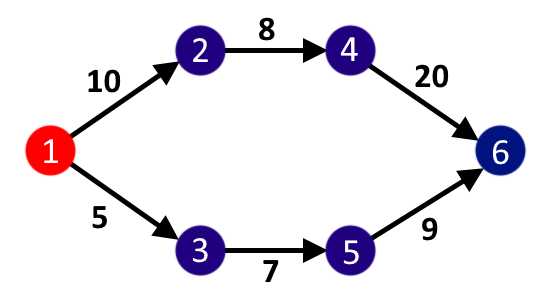

Desejamos determinar qual a maior quantidade de fluxo (produtos, veículos, etc.) que pode passar nos caminhos de um dado nó inicial para um dado nó final, onde cada arco possui um capacidade limitada de fluxo.

Dados do problema:  
- nó inicial (origem do fluxo);  
- nó final (destino do fluxo);  
- pesos dos arcos (capacidades dos arcos).  

Variáveis de decisão:  
$X_{ij}:$ onde $i$ é o nó de origem e $j$ é o nó de destino do arco.  

A função objetivo a ser maximizada é representada por um arco *dummy*, que sai do nó final e leva ao nó inicial, de alta capacidade. O fluxo efetivo nesse arco corresponde à soma dos fluxos dos caminhos gerados determinados pelos outros arcos.

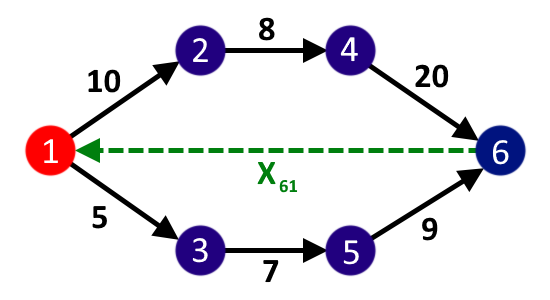

Na forma de um problema de programação linear:

$\text{Maximizar}\ X_{16}$  
$\text{Sujeito a}
    \begin{cases}        
        \left. \begin{array}{l}
            X_{61}-X_{12}-X_{13} = 0\ \\
            X_{12}-X_{24} = 0\ \\
            X_{13}-X_{35} = 0\ \\
            X_{24}-X_{46} = 0\ \\
            X_{35}-X_{56} = 0\ \\
            X_{46}+X_{56}-X_{61} = 0\ \\
        \end{array}\right\}\ \text{(restrições dos nós)} \\
        \left. \begin{array}{l}
            X_{12} \le 10\ \\
            X_{13} \le 5\ \\
            X_{24} \le 8\ \\
            X_{35} \le 7\ \\
            X_{46} \le 20\ \\
            X_{56} \le 9\ \\
            X_{61} \le 100\ \\
        \end{array}\right\}\ \text{(restrições dos arcos)} \\
        X_{12},\ X_{13},\ X_{24},\ X_{35},\ X_{46},\ X_{56},\ X_{61} \ge 0
    \end{cases}$  
    
## Exemplo em `Julia`

Seja o seguinte problema do fluxo máximo:

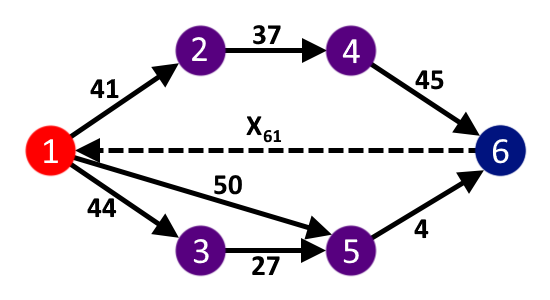

Resolvendo com `Julia`:

In [1]:
# Bibliotecas a serem usadas
using JuMP, GLPK

In [2]:
# Número de nós e caminhos
nodes = 1:6
no_link = 8

# Inícios e fins dos 8 caminhos
start_node = [1, 1, 1, 2, 3, 4, 5, 6]
end_node = [2, 3, 5, 4, 5, 6, 6, 1]

# Custos dos caminhos
c = [41, 44, 50, 37, 27, 45, 4, 300]

# Caminhos
links = Tuple( (start_node[i], end_node[i]) for i in 1:no_link )
c_dict = Dict(links .=> c)
    
links

((1, 2), (1, 3), (1, 5), (2, 4), (3, 5), (4, 6), (5, 6), (6, 1))

In [3]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis
@variable(model, 0 <= x[link in links] <= c_dict[link])

# Função objetivo
@objective(model, Max, x[(6,1)])

# Restricões
for i in nodes
   @constraint(model, -sum(x[(ii,j)] for (ii,j) in links if ii==i)
                   + sum(x[(j,ii)] for (j,ii) in links if ii==i) == 0)
end

# Descrição do modelo
println(model)

Max x[(6, 1)]
Subject to
 -x[(1, 2)] - x[(1, 3)] - x[(1, 5)] + x[(6, 1)] == 0
 x[(1, 2)] - x[(2, 4)] == 0
 x[(1, 3)] - x[(3, 5)] == 0
 x[(2, 4)] - x[(4, 6)] == 0
 x[(1, 5)] + x[(3, 5)] - x[(5, 6)] == 0
 x[(4, 6)] + x[(5, 6)] - x[(6, 1)] == 0
 x[(1, 2)] >= 0
 x[(1, 3)] >= 0
 x[(1, 5)] >= 0
 x[(2, 4)] >= 0
 x[(3, 5)] >= 0
 x[(4, 6)] >= 0
 x[(5, 6)] >= 0
 x[(6, 1)] >= 0
 x[(1, 2)] <= 41
 x[(1, 3)] <= 44
 x[(1, 5)] <= 50
 x[(2, 4)] <= 37
 x[(3, 5)] <= 27
 x[(4, 6)] <= 45
 x[(5, 6)] <= 4
 x[(6, 1)] <= 300



In [4]:
# Otimização do modelo
JuMP.optimize!(model)
obj = JuMP.objective_value(model)

# Valor do fluxo máximo
println(obj)

# Caminho do fluxo máximo
println("Função Objetivo: FO=", obj)
for link in links
  println("Valor de x",link," = ",value(x[link]))
end

41.0
Função Objetivo: FO=41.0
Valor de x(1, 2) = 37.0
Valor de x(1, 3) = 0.0
Valor de x(1, 5) = 4.0
Valor de x(2, 4) = 37.0
Valor de x(3, 5) = 0.0
Valor de x(4, 6) = 37.0
Valor de x(5, 6) = 4.0
Valor de x(6, 1) = 41.0


Ou seja, o fluxo máximo entre os nós 1 e 6 é:

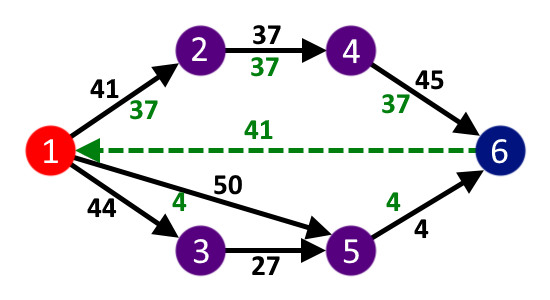

# O Problema do Transporte como um Problema de Fluxo

O Problema do Transporte também pode ser representado como um Problema de Fluxo.

Seja o seguinte Problema do Transporte:

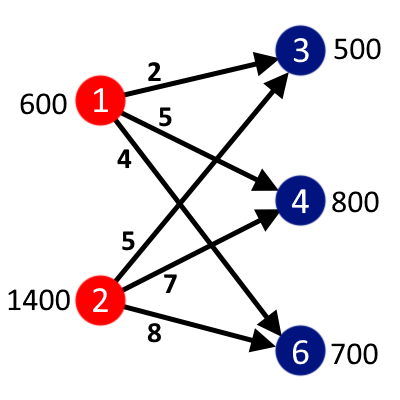

Na forma de um problema de fluxo:

$\text{Maximizar}\ 2X_{13}+5X_{14}+4X_{15}+5X_{23}+7X_{24}+8X_{25}$  
$\text{Sujeito a}
    \begin{cases}
        \left. \begin{array}{l}
            -X_{13}-X_{14}-X_{15} = -600 \\
            -X_{23}-X_{24}-X_{25} = -1400 \\
        \end{array}\right\} \text{Restrições de capacidade} \\
        \left. \begin{array}{l}
            X_{13}+X_{23} = 500 \\
            X_{14}+X_{24} = 800 \\
            X_{15}+X_{25} = 700 \\
        \end{array}\right\}\ \text{Restrições de demanda} \\
    X_{13},\ X_{14},\ X_{15},\ X_{23},\ X_{24},\ X_{25} \ge 0
    \end{cases}$  
    
## Exemplo:

Considere o seguinte Problema do Transporte:

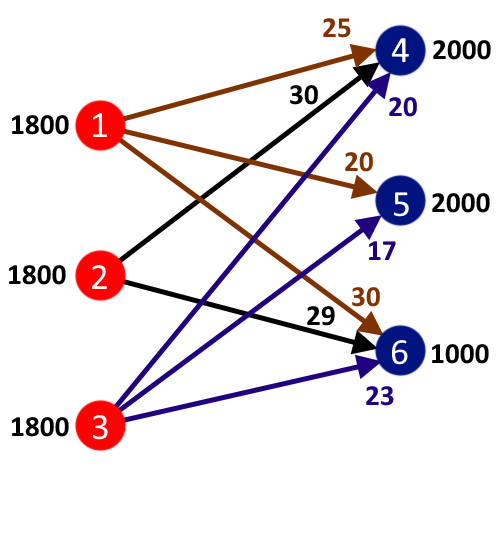

Note que um nó *dummy* de demanda igual a 400 será necessário.

In [5]:
# Custos dos arcos
c = [25,20,30,1000, 30,29,1000, 20,17,23,1000]

# Restrições de capacidades e demandas
b = [1800, 1800, 1800, 2000, 2000, 1000, 400]

# Início e fim dos arcos
start_node = [1,1,1,1, 2,2,2, 3,3,3,3]
end_node = [4,5,6,7, 4,6,7, 4,5,6,7]

# Arcos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(end_node) )
c_dict = Dict(links .=> c)
    
links

((1, 4), (1, 5), (1, 6), (1, 7), (2, 4), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7))

In [6]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis
@variable(model, x[link in links]>=0)

# Objetivo
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

for i in 1:3
   @constraint(model, sum(x[(ii,j)] for (ii,j) in links if ii==i) == b[i])
end
for j in 4:7
   @constraint(model, sum(x[(i,jj)] for (i,jj) in links if jj==j) == b[j])
end

# Descrição do Modelo
println(model)

Min 25 x[(1, 4)] + 20 x[(1, 5)] + 30 x[(1, 6)] + 1000 x[(1, 7)] + 30 x[(2, 4)] + 29 x[(2, 6)] + 1000 x[(2, 7)] + 20 x[(3, 4)] + 17 x[(3, 5)] + 23 x[(3, 6)] + 1000 x[(3, 7)]
Subject to
 x[(1, 4)] + x[(1, 5)] + x[(1, 6)] + x[(1, 7)] == 1800
 x[(2, 4)] + x[(2, 6)] + x[(2, 7)] == 1800
 x[(3, 4)] + x[(3, 5)] + x[(3, 6)] + x[(3, 7)] == 1800
 x[(1, 4)] + x[(2, 4)] + x[(3, 4)] == 2000
 x[(1, 5)] + x[(3, 5)] == 2000
 x[(1, 6)] + x[(2, 6)] + x[(3, 6)] == 1000
 x[(1, 7)] + x[(2, 7)] + x[(3, 7)] == 400
 x[(1, 4)] >= 0
 x[(1, 5)] >= 0
 x[(1, 6)] >= 0
 x[(1, 7)] >= 0
 x[(2, 4)] >= 0
 x[(2, 6)] >= 0
 x[(2, 7)] >= 0
 x[(3, 4)] >= 0
 x[(3, 5)] >= 0
 x[(3, 6)] >= 0
 x[(3, 7)] >= 0



In [7]:
# Otimização do Modelo
JuMP.optimize!(model)
obj = JuMP.objective_value(model)

# Resultados
println("FO=", obj)
for link in links
  println("x(",link,")= ",value(x[link]))
end

FO=512400.0
x((1, 4))= 0.0
x((1, 5))= 1800.0
x((1, 6))= 0.0
x((1, 7))= 0.0
x((2, 4))= 400.0
x((2, 6))= 1000.0
x((2, 7))= 400.0
x((3, 4))= 1600.0
x((3, 5))= 200.0
x((3, 6))= 0.0
x((3, 7))= 0.0


Ou seja, o transporte ótimo é

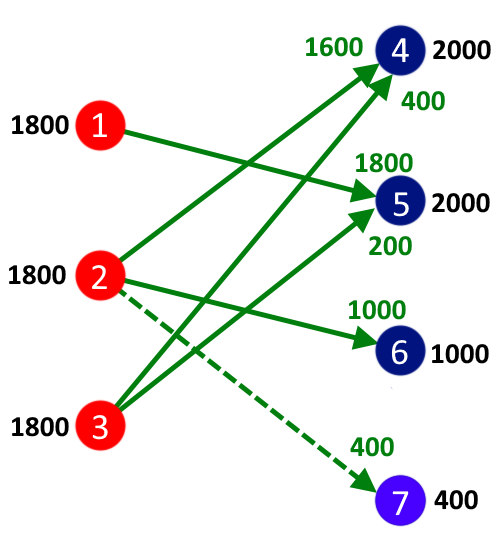

# Problema da Designação ou Atribuição

Em um Problema de Designação deseja-se associar cada um dos nós de origem a exatamente um dos nós de destino de forma ótima. Por exemplo, uma fábrica interessada em associar cada funcionário a uma máquina de forma que a produtividade total seja máxima, ou dividir um conjunto de etapas de um processo entre um grupo de pessoas de forma que o tempo total seja mínimo.

O Problema da Designação é semelhante a um Problema de Transporte, mas com variáveis de decisão binárias.

- Dados:  
    I. Nó de origem  
    II. Nó de destino  
    III. Peso dos arcos (distância, tempo, tipo de estrada, etc.)  
    
- Objetivo: otimizar o somatório do peso dos arcos 

- Variáveis de decisão  
    $X_{ij}=\begin{cases}
                1,\ \text{se o nó inicial}\ i\ \text{está associado ao nó final}\ i; \\
                0,\ \text{caso contrário.}
            \end{cases}$

## Exemplo

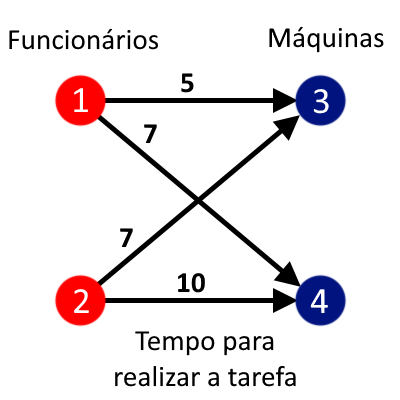

Na forma de um problema de programação linear:

$\text{Minimizar}\ 5X_{13}+7X_{14}+7X_{23}+10X_{24}$  
$\text{Sujeito a}
    \begin{cases}
        \left. \begin{array}{l}
            X_{13}+X_{14} = 1\ \\
            X_{23}+X_{24} = 1\ \\
        \end{array}\right\} \text{Restrições dos nós inciais} \\
        \left. \begin{array}{l}
            X_{13}+X_{23} = 1\ \\
            X_{14}+X_{24} = 1\ \\
        \end{array}\right\} \text{Restrições dos nós de destino} \\
        X_{13},\ X_{14},\ X_{23},\ X_{24} \ge 0
    \end{cases}$  

## Problema desbalanceado

Um problema de designação é dito desbalanceado quando há diferença entre os números de nós iniciais e finais.

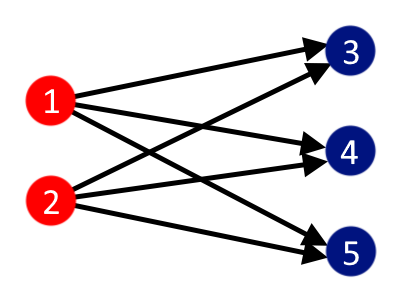

Na forma de um problema de programação linear:

$\text{Minimizar}\ 5X_{13}+7X_{14}+7X_{23}+10X_{24}$  
$\text{Sujeito a}
    \begin{cases}
        \left. \begin{array}{l}
            X_{13} +X_{14} +X_{15} = 1 \\
            X_{23} +X_{24} +X_{25}= 1 \\
        \end{array}\right\} \text{Restrições dos nós iniciais} \\
        \left. \begin{array}{l}
            X_{13}+X_{23} \le 1 \\
            X_{14}+X_{24} \le 1 \\
            X_{15}+X_{25} \le 1 \\
        \end{array}\right\} \text{Restrições dos nós de destino} \\
        X_{13},\ X_{14},\ X_{15},\ X_{23},\ X_{24}, X_{25},\ \ge 0
    \end{cases}$  
    
A "folga" é representada por uma desigualdade.

## Exemplo em `Julia`

Seja o seguinte Problema de Atribuição:

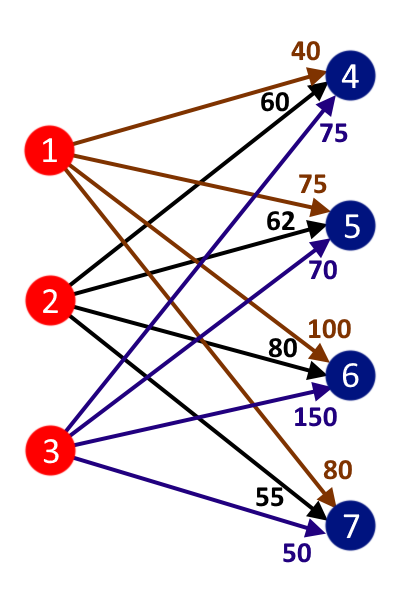

Resolvendo com `Julia`:

In [8]:
# Pesos dos arcos
c = [40,75,100,80, 60,62,80,55, 75,70,120,50]

# Início e fim dos arcos
start_node = [1,1,1,1, 2,2,2,2, 3,3,3,3]
end_node = [4,5,6,7, 4,5,6,7, 4,5,6,7]

# Arcos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(end_node) )
c_dict = Dict(links .=> c)
links

((1, 4), (1, 5), (1, 6), (1, 7), (2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7))

In [9]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis
@variable(model, x[link in links]>=0)

# Função objetivo
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

# Restrições de nós iniciais
for i in 1:3
   @constraint(model, sum(x[(ii,j)] for (ii,j) in links if ii==i) == 1)
 end

# Restrições de nós de destino
for j in 4:7
   @constraint(model, sum(x[(i,jj)] for (i,jj) in links if jj==j) <= 1)
end

# Descrição do modelo
println(model)

Min 40 x[(1, 4)] + 75 x[(1, 5)] + 100 x[(1, 6)] + 80 x[(1, 7)] + 60 x[(2, 4)] + 62 x[(2, 5)] + 80 x[(2, 6)] + 55 x[(2, 7)] + 75 x[(3, 4)] + 70 x[(3, 5)] + 120 x[(3, 6)] + 50 x[(3, 7)]
Subject to
 x[(1, 4)] + x[(1, 5)] + x[(1, 6)] + x[(1, 7)] == 1
 x[(2, 4)] + x[(2, 5)] + x[(2, 6)] + x[(2, 7)] == 1
 x[(3, 4)] + x[(3, 5)] + x[(3, 6)] + x[(3, 7)] == 1
 x[(1, 4)] + x[(2, 4)] + x[(3, 4)] <= 1
 x[(1, 5)] + x[(2, 5)] + x[(3, 5)] <= 1
 x[(1, 6)] + x[(2, 6)] + x[(3, 6)] <= 1
 x[(1, 7)] + x[(2, 7)] + x[(3, 7)] <= 1
 x[(1, 4)] >= 0
 x[(1, 5)] >= 0
 x[(1, 6)] >= 0
 x[(1, 7)] >= 0
 x[(2, 4)] >= 0
 x[(2, 5)] >= 0
 x[(2, 6)] >= 0
 x[(2, 7)] >= 0
 x[(3, 4)] >= 0
 x[(3, 5)] >= 0
 x[(3, 6)] >= 0
 x[(3, 7)] >= 0



In [10]:
# Otimização do Modelo
JuMP.optimize!(model)
obj = JuMP.objective_value(model)

# Resultados
println("FO=", obj)
for link in links
  println("x(",link,")= ",value(x[link]))
 end

FO=152.0
x((1, 4))= 1.0
x((1, 5))= 0.0
x((1, 6))= 0.0
x((1, 7))= 0.0
x((2, 4))= 0.0
x((2, 5))= 1.0
x((2, 6))= 0.0
x((2, 7))= 0.0
x((3, 4))= 0.0
x((3, 5))= 0.0
x((3, 6))= 0.0
x((3, 7))= 1.0


Ou seja, a solução ótima é:

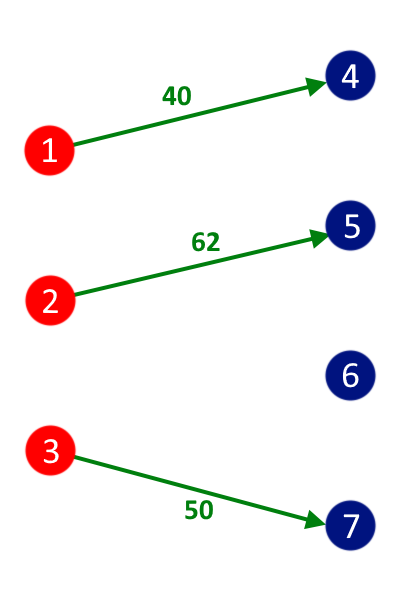